<a href="https://colab.research.google.com/github/joaolucasgl12/Projetos-/blob/main/Custos_M%C3%A9dicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problema: Estimar o custo médico de clientes.
### Solução: Prever o custo médico de cada cliente.

 ## Traduções das   Colunas

**idade:** idade do beneficiário primário

**sexo:** gênero empreiteiro de seguros, feminino, masculino

**bmi**: Índice de massa corporal, proporcionando uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura,
índice objetivo de peso corporal (kg / m ^ 2) utilizando a razão de altura para peso, idealmente 18,5 a 24,9

**crianças**: Número de crianças cobertas por seguro de saúde / Número de dependentes

**fumante**: Fumar

**região**: área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.

**Encargos**: Custos médicos individuais cobrados pelo seguro de saúde

In [1]:
!pip install plotly==5.1.0

     |████████████████████████████████| 20.6MB 44.1MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [3]:
base_seguro = pd.read_csv('/content/insurance.csv')
base_seguro

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Subtituindo yes por 1 caso fume e 0 para os que não fume
base_seguro['smoker'] = base_seguro['smoker'].apply(lambda x: 1 if x=='yes' else 0)

In [5]:
base_seguro

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [6]:
base_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [7]:
base_seguro.describe()

,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422265
std,14.049960,6.098187,1.205493,0.403694,12110.011237
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,53.130000,5.000000,1.000000,63770.428010


## Visualição Gráfica

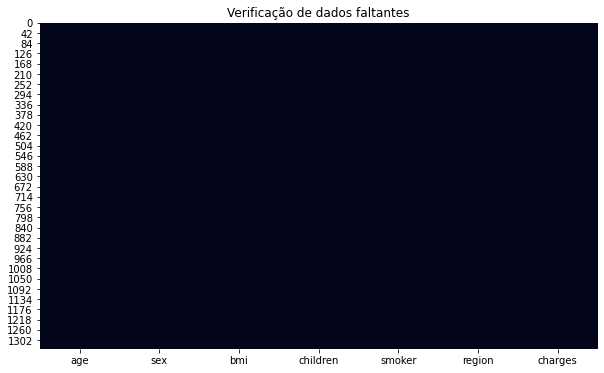

In [8]:
plt.subplots(figsize=(10,6))
sns.heatmap(base_seguro.isnull(),cbar=False);
plt.title('Verificação de dados faltantes');

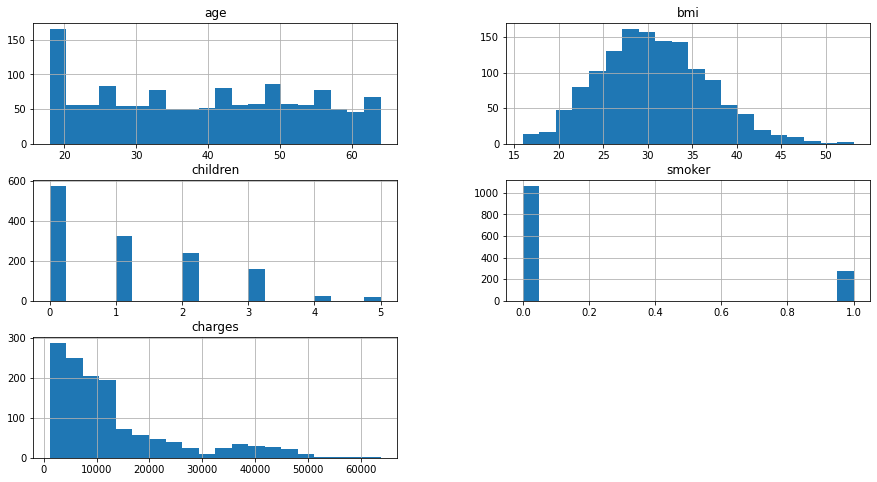

In [9]:
base_seguro.hist(bins=20,figsize=(15,8),);

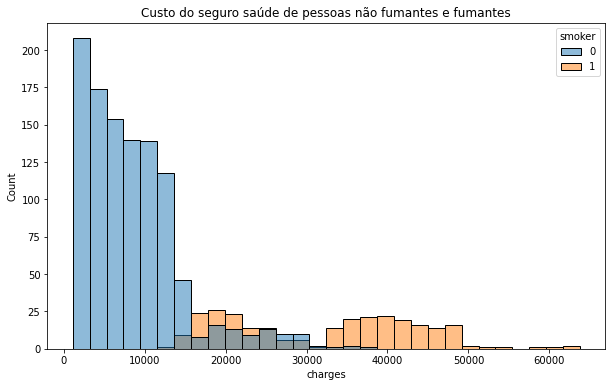

In [10]:
plt.subplots(figsize=(10,6));
sns.histplot(x='charges',hue='smoker',data=base_seguro)
plt.title('Custo do seguro saúde de pessoas não fumantes e fumantes');

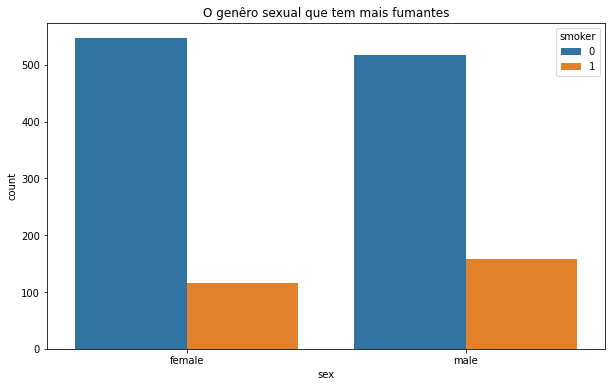

In [11]:
plt.subplots(figsize=(10,6))
sns.countplot(x='sex',hue='smoker',data=base_seguro);
plt.title('O genêro sexual que tem mais fumantes');

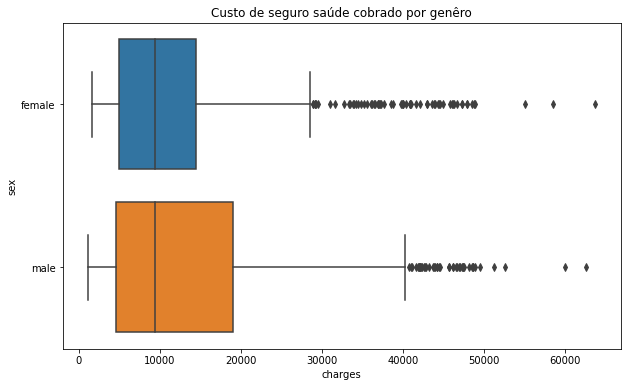

In [12]:
plt.subplots(figsize=(10,6))
sns.boxplot(x='charges',y='sex',data=base_seguro);
plt.title('Custo de seguro saúde cobrado por genêro');

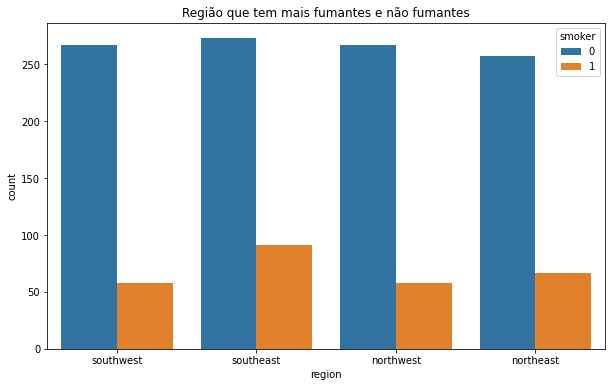

In [13]:
plt.subplots(figsize=(10,6))
sns.countplot(x='region',hue='smoker',data=base_seguro);
plt.title('Região que tem mais fumantes e não fumantes');

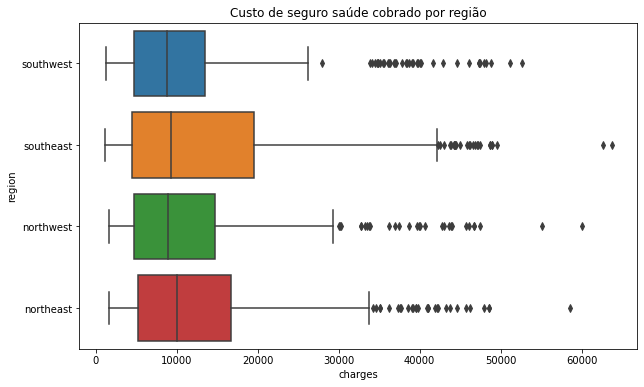

In [14]:
plt.subplots(figsize=(10,6))
sns.boxplot(x='charges',y='region',data=base_seguro);
plt.title('Custo de seguro saúde cobrado por região');
# a região southeast é que tem mais fumantes e a região que tem mais custos com seguro saúde.

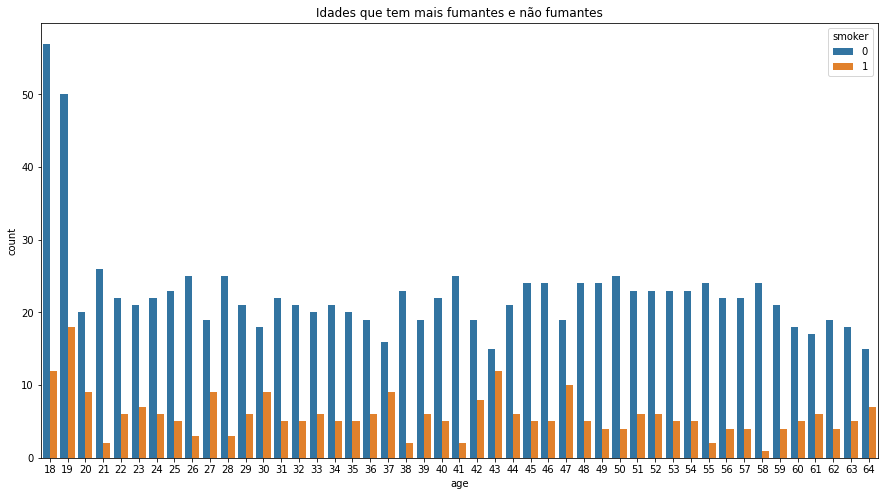

In [15]:
plt.subplots(figsize=(15,8))
sns.countplot(x='age',hue='smoker',data=base_seguro);
plt.title('Idades que tem mais fumantes e não fumantes');

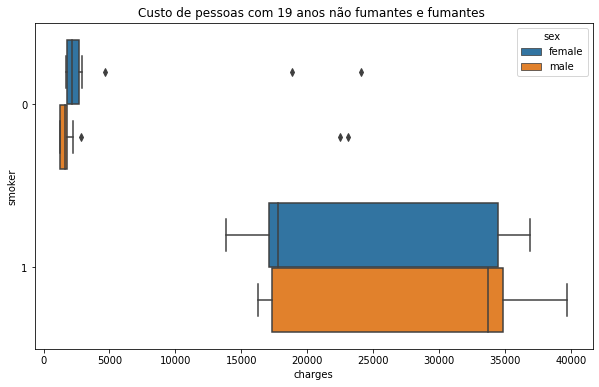

In [16]:
plt.subplots(figsize=(10,6))
sns.boxplot(y="smoker", x="charges",hue='sex', data = base_seguro[(base_seguro.age == 19)] , orient="h")
plt.title("Custo de pessoas com 19 anos não fumantes e fumantes ");

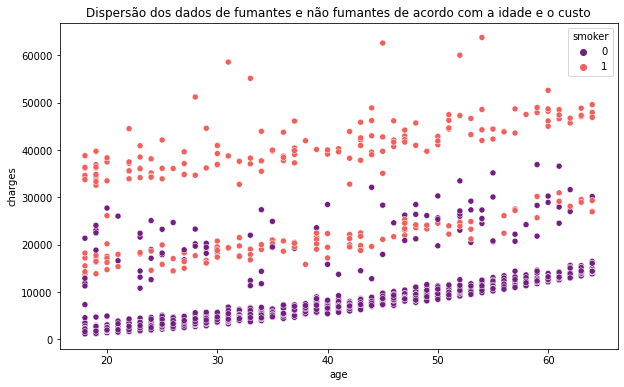

In [17]:
plt.subplots(figsize=(10,6))
sns.scatterplot(x='age',y='charges',data=base_seguro,palette='magma',hue='smoker');
plt.title('Dispersão dos dados de fumantes e não fumantes de acordo com a idade e o custo');

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


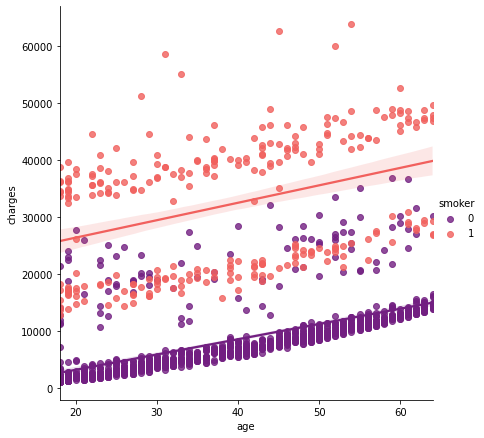

In [18]:
sns.lmplot(x='age',y='charges',hue='smoker',data=base_seguro,palette='magma',size=6);

**Correlação**: é a medida de grau de relação entre duas variávies que varia de -1 até 1.

   * valores positivos - indica que quando uma variavel aumenta a outra também aumenta.

* valores negativos - indica que quando uma variável aumenta a outra diminue.


    (0,03 até 0,65) - correlação média
    (0,65 até 0,95) - correlação forte 
    (0,95 até 1) - correlação muito forte

OBS: as classificações de correlações serve tanto para valores positivos e negativos 

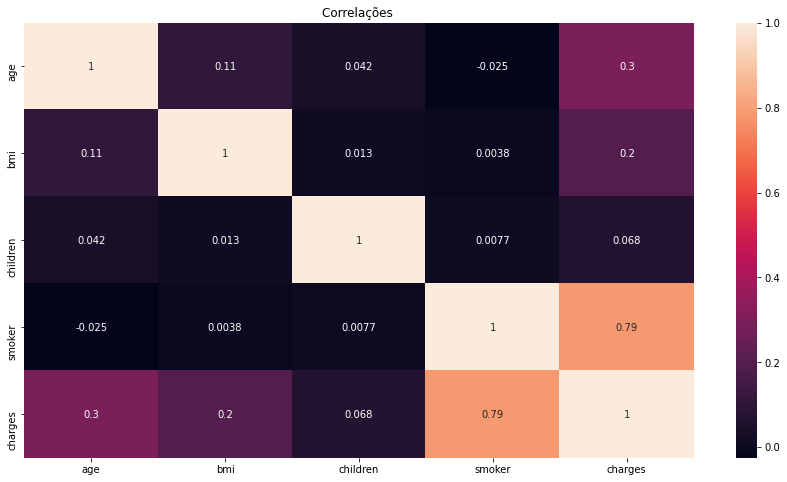

In [19]:
correlacao = base_seguro.corr()
plt.subplots(figsize=(15,8));
sns.heatmap(correlacao,annot=True);
plt.title('Correlações ');

##Pré processamento

In [20]:
base_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


### Aplicando o método get_dummies()
objetivo: transforma dados não númericos em númericos 

In [21]:
# Transformando dados não numericos em númericos 
x = base_seguro.iloc[:,0:6]
x = pd.get_dummies(x).values
x

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

In [22]:
y = base_seguro[['charges']].values
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

### Separando os dados em um conjunto de treino e de teste

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 0) # usando 25% dos dados para teste e random para garantir que usará os mesmos dados

In [24]:
x_train,y_train.shape

(array([[32.  , 29.59,  1.  , ...,  0.  ,  1.  ,  0.  ],
        [61.  , 22.04,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [19.  , 24.6 ,  1.  , ...,  0.  ,  0.  ,  1.  ],
        ...,
        [40.  , 25.08,  0.  , ...,  0.  ,  1.  ,  0.  ],
        [19.  , 35.53,  0.  , ...,  1.  ,  0.  ,  0.  ],
        [33.  , 18.5 ,  1.  , ...,  0.  ,  0.  ,  1.  ]]), (1003, 1))

In [25]:
x_test ,y_test.shape

(array([[52.   , 30.2  ,  1.   , ...,  0.   ,  0.   ,  1.   ],
        [47.   , 29.37 ,  1.   , ...,  0.   ,  1.   ,  0.   ],
        [48.   , 40.565,  2.   , ...,  1.   ,  0.   ,  0.   ],
        ...,
        [51.   , 30.03 ,  1.   , ...,  0.   ,  1.   ,  0.   ],
        [23.   , 37.1  ,  3.   , ...,  0.   ,  0.   ,  1.   ],
        [61.   , 29.07 ,  0.   , ...,  1.   ,  0.   ,  0.   ]]), (335, 1))

### Normalizando os dados 
Para evitar que as varivéis com escalas maiores tenha uma influência sobre as outras variáveis.

o método usado é o StandardScaler -> subtrai o valor em questão pela a média da coluna e divide pelo o desvio padrão (valor - média) / desvio padrão. 

In [26]:
# normalizando as variáveis 'age','children','bmi
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_train_scaled[:,[0,1,2]] = scaler.fit_transform(x_train[:,[0,1,2]]) 

x_test_scaled = x_test.copy()
x_test_scaled[:,[0,1,2]] = scaler.transform(x_test_scaled[:,[0,1,2]])
x_test_scaled, x_train_scaled

(array([[ 0.9083187 , -0.08342407, -0.06360657, ...,  0.        ,
          0.        ,  1.        ],
        [ 0.55252566, -0.21664175, -0.06360657, ...,  0.        ,
          1.        ,  0.        ],
        [ 0.62368427,  1.58019189,  0.76493093, ...,  1.        ,
          0.        ,  0.        ],
        ...,
        [ 0.8371601 , -0.11070962, -0.06360657, ...,  0.        ,
          1.        ,  0.        ],
        [-1.15528093,  1.0240482 ,  1.59346844, ...,  0.        ,
          0.        ,  1.        ],
        [ 1.54874618, -0.26479272, -0.89214407, ...,  1.        ,
          0.        ,  0.        ]]),
 array([[-0.51485346, -0.18133104, -0.06360657, ...,  0.        ,
          1.        ,  0.        ],
        [ 1.54874618, -1.39313042, -0.89214407, ...,  0.        ,
          0.        ,  0.        ],
        [-1.43991536, -0.98224215, -0.06360657, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [ 0.05441541, -0.9052006 , -0.89214407, ...,  

## Regressao multipla
é modelagem entre variáveis númericas , seu objetivo é  encontrar o B0 que o coeficiente da reta, os coeficientes das variaveis explanátorias e encontrar a melhor reta que encaixe nos dados .

usando a **equação da reta:**

y= b0 + b1 . x1 + b2 . x2....

In [27]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
previsao_linear = regressor_linear.predict(x_test_scaled)
previsao_linear

array([[11121.10140924],
       [ 9369.08345223],
       [38349.2588068 ],
       [16331.93500645],
       [ 7041.22770615],
       [ 4103.24923177],
       [ 1734.03805961],
       [14478.86491464],
       [ 9168.77981235],
       [ 7715.94671029],
       [ 4625.04765547],
       [10398.53755318],
       [ 8756.48015868],
       [ 3738.25833927],
       [28190.41129687],
       [10600.67828764],
       [11395.63055992],
       [ 6248.83935385],
       [ 8423.19721152],
       [27360.73273479],
       [33843.62542848],
       [14432.50562897],
       [11759.04359894],
       [32070.2132407 ],
       [ 4152.83526684],
       [ 9364.57488075],
       [ 1227.5561631 ],
       [ 9712.31328139],
       [ 3714.56843696],
       [10585.88359557],
       [ 9162.47300707],
       [39963.69536536],
       [15580.1455371 ],
       [13795.75096539],
       [24960.11670118],
       [ 5274.13784945],
       [12507.41956494],
       [30840.51073591],
       [33738.39701967],
       [ 3693.97640602],


In [29]:
y_test

array([[ 9724.53    ],
       [ 8547.6913  ],
       [45702.02235 ],
       [12950.0712  ],
       [ 9644.2525  ],
       [ 4500.33925 ],
       [ 2198.18985 ],
       [11436.73815 ],
       [ 7537.1639  ],
       [ 5425.02335 ],
       [ 6753.038   ],
       [10493.9458  ],
       [ 7337.748   ],
       [ 4185.0979  ],
       [18310.742   ],
       [10702.6424  ],
       [12523.6048  ],
       [ 3490.5491  ],
       [ 6457.8434  ],
       [33475.81715 ],
       [23967.38305 ],
       [12643.3778  ],
       [23045.56616 ],
       [23065.4207  ],
       [ 1674.6323  ],
       [ 4667.60765 ],
       [ 3732.6251  ],
       [ 7682.67    ],
       [ 3756.6216  ],
       [ 8413.46305 ],
       [ 8059.6791  ],
       [48970.2476  ],
       [12979.358   ],
       [20630.28351 ],
       [14571.8908  ],
       [ 4137.5227  ],
       [ 8347.1643  ],
       [51194.55914 ],
       [40003.33225 ],
       [ 1880.487   ],
       [ 5458.04645 ],
       [ 2867.1196  ],
       [20149.3229  ],
       [474

In [30]:
# B0 -> Coeficiente linear 
regressor_linear.intercept_

array([8461.6355048])

In [31]:
# B1,B2.... -> Coeficientes das variáveis explanatorias 
regressor_linear.coef_

array([[ 3.51541626e+03,  2.07657350e+03,  5.33728116e+02,
         2.36566205e+04, -6.63153624e+00,  6.63153624e+00,
         5.35344576e+02,  3.42211643e+02, -5.44457080e+02,
        -3.33099139e+02]])

In [32]:
# Accuracy
regressor_linear_score = regressor_linear.score(x_test_scaled,y_test)
regressor_linear_score

0.7958786376014415

In [33]:
# Usando o método root mean squared error - a soma das diferença dos erros elevada ao quadrado e depois elevar raiz quadrada
from sklearn.metrics import mean_squared_error
error_linear = np.sqrt(mean_squared_error(y_test,previsao_linear))
error_linear

5668.8400259119835

## Regressao Polynomial

é a modelagem entre variáveis númericas e seu objetivo é encontrar o B0 que o coeficiente da reta, os coeficientes das variaveis explanátorias e encontrar a melhor reta que encaixe nos dados .

usando a mesma da equação da reta linear sendo que elevando as variavéis explanattorias ao quadrado :

y= b0 + b1 . x1 + b2 . x1² + b3 . x2 + b4 .x2² ... 

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

In [35]:
regressor_poly = LinearRegression()
regressor_poly.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
previsao_poly = regressor_poly.predict(x_test_poly)
previsao_poly

array([[11581.12402344],
       [10271.38964844],
       [50273.74902344],
       [15070.90527344],
       [ 7648.93652344],
       [ 4840.27246094],
       [ 4504.62402344],
       [14826.56152344],
       [10581.68652344],
       [ 8846.40527344],
       [ 8369.56152344],
       [11974.43652344],
       [ 8835.78027344],
       [ 5560.88964844],
       [25434.34277344],
       [12530.99902344],
       [12968.81152344],
       [ 6110.40527344],
       [ 9288.98339844],
       [28099.90527344],
       [26556.62402344],
       [15030.90527344],
       [11645.71777344],
       [29747.21777344],
       [ 3408.20996094],
       [ 7346.26464844],
       [ 3958.65527344],
       [ 9492.40527344],
       [ 5156.18652344],
       [11350.48339844],
       [10816.56152344],
       [52344.18652344],
       [14675.34277344],
       [11849.84277344],
       [14348.48339844],
       [ 6242.34277344],
       [10225.68652344],
       [36933.90527344],
       [36870.37402344],
       [ 2574.49902344],


In [37]:
y_test

array([[ 9724.53    ],
       [ 8547.6913  ],
       [45702.02235 ],
       [12950.0712  ],
       [ 9644.2525  ],
       [ 4500.33925 ],
       [ 2198.18985 ],
       [11436.73815 ],
       [ 7537.1639  ],
       [ 5425.02335 ],
       [ 6753.038   ],
       [10493.9458  ],
       [ 7337.748   ],
       [ 4185.0979  ],
       [18310.742   ],
       [10702.6424  ],
       [12523.6048  ],
       [ 3490.5491  ],
       [ 6457.8434  ],
       [33475.81715 ],
       [23967.38305 ],
       [12643.3778  ],
       [23045.56616 ],
       [23065.4207  ],
       [ 1674.6323  ],
       [ 4667.60765 ],
       [ 3732.6251  ],
       [ 7682.67    ],
       [ 3756.6216  ],
       [ 8413.46305 ],
       [ 8059.6791  ],
       [48970.2476  ],
       [12979.358   ],
       [20630.28351 ],
       [14571.8908  ],
       [ 4137.5227  ],
       [ 8347.1643  ],
       [51194.55914 ],
       [40003.33225 ],
       [ 1880.487   ],
       [ 5458.04645 ],
       [ 2867.1196  ],
       [20149.3229  ],
       [474

In [38]:
# B0 -> valor constante
regressor_poly.intercept_

array([7.43078967e+12])

In [39]:
# Coeficentes 
regressor_poly.coef_

array([[-8.88663514e+10,  1.07320111e+14,  3.62528492e+14,
         1.28323743e+14,  1.84428058e+14,  5.47755676e+14,
         1.80598441e+14,  1.00031397e+12, -1.57638744e+14,
         2.83441964e+13, -1.60294039e+14,  5.92499852e+02,
         7.10621655e+01,  1.04198924e+01,  1.01847083e+02,
        -1.84516499e+14, -1.84516499e+14,  7.71963883e+13,
         7.71963883e+13,  7.71963883e+13,  7.71963883e+13,
        -3.06333384e+02,  1.34044302e+02,  8.95345750e+03,
         1.00804921e+13,  1.00804921e+13, -3.72608984e+14,
        -3.72608984e+14, -3.72608984e+14, -3.72608984e+14,
        -1.27053255e+02, -5.91638017e+02, -4.81839616e+13,
        -4.81839616e+13, -8.01397815e+13, -8.01397815e+13,
        -8.01397815e+13, -8.01397815e+13, -4.53102678e+13,
        -2.00902693e+14, -2.00902693e+14,  6.17849028e+13,
         6.17849028e+13,  6.17849028e+13,  6.17849028e+13,
        -9.65037865e+13,  0.00000000e+00, -2.01437812e+14,
        -2.09057893e+14, -6.80339097e+14, -1.33924862e+1

In [40]:
# accuraccy
regressor_poly_score = regressor_poly.score(x_test_poly,y_test)
regressor_poly_score

0.8841877073357676

In [41]:
erro_poly = np.sqrt(mean_squared_error(y_test,previsao_poly))
erro_poly

4269.994364254148

## Regressão Arvore De Decisão

objetivo: emitir uma serie de regras através do ganho de informação. o atributo mais importante ficará no topo.



In [42]:
from sklearn.tree import DecisionTreeRegressor
regressor_arvore = DecisionTreeRegressor()
regressor_arvore.fit(x_train_scaled,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [43]:
previsao_arvore = regressor_arvore.predict(x_test_scaled)
previsao_arvore

array([10085.846  ,  8233.0975 , 44202.6536 , 13429.0354 ,  9264.797  ,
       21984.47061,  2196.4732 , 10600.5483 ,  7209.4918 ,  6128.79745,
        5116.5004 , 30284.64294,  6849.026  ,  4779.6023 , 18033.9679 ,
       11015.1747 , 12124.9924 ,  3292.52985,  6455.86265, 33907.548  ,
       24667.419  , 12495.29085, 10072.05505, 25309.489  , 11482.63485,
        4462.7218 ,  3558.62025,  7209.4918 ,  3757.8448 ,  8116.26885,
        7201.70085, 48673.5588 , 13393.756  ,  9850.432  , 15359.1045 ,
        3645.0894 ,  8978.1851 , 35585.576  , 39983.42595,  1391.5287 ,
       21984.47061,  3736.4647 , 17904.52705, 49577.6624 , 37165.1638 ,
        3579.8287 , 11015.1747 ,  6272.4772 ,  4719.52405, 27117.99378,
        2855.43755,  4618.0799 , 25309.489  , 44641.1974 , 11856.4115 ,
       19673.33573,  3292.52985,  8932.084  ,  8211.1002 , 12913.9924 ,
        1252.407  , 47291.055  , 12928.7911 , 10118.424  , 26392.26029,
        9877.6077 , 33907.548  , 55135.40209,  2913.569  ,  9222

In [44]:
y_test

array([[ 9724.53    ],
       [ 8547.6913  ],
       [45702.02235 ],
       [12950.0712  ],
       [ 9644.2525  ],
       [ 4500.33925 ],
       [ 2198.18985 ],
       [11436.73815 ],
       [ 7537.1639  ],
       [ 5425.02335 ],
       [ 6753.038   ],
       [10493.9458  ],
       [ 7337.748   ],
       [ 4185.0979  ],
       [18310.742   ],
       [10702.6424  ],
       [12523.6048  ],
       [ 3490.5491  ],
       [ 6457.8434  ],
       [33475.81715 ],
       [23967.38305 ],
       [12643.3778  ],
       [23045.56616 ],
       [23065.4207  ],
       [ 1674.6323  ],
       [ 4667.60765 ],
       [ 3732.6251  ],
       [ 7682.67    ],
       [ 3756.6216  ],
       [ 8413.46305 ],
       [ 8059.6791  ],
       [48970.2476  ],
       [12979.358   ],
       [20630.28351 ],
       [14571.8908  ],
       [ 4137.5227  ],
       [ 8347.1643  ],
       [51194.55914 ],
       [40003.33225 ],
       [ 1880.487   ],
       [ 5458.04645 ],
       [ 2867.1196  ],
       [20149.3229  ],
       [474

In [45]:
regressor_arvore.feature_importances_ # as features mais importantes (age,bmi,children,smoker)

array([0.13040952, 0.21749519, 0.02846785, 0.60412933, 0.00134829,
       0.0006758 , 0.00280288, 0.00397616, 0.0071141 , 0.00358088])

In [46]:
regressor_arvore_score = regressor_arvore.score(x_test_scaled,y_test)
regressor_arvore_score

0.7306343197345794

In [47]:
erro_arvore = np.sqrt(mean_squared_error(y_test,previsao_arvore))
erro_arvore

6512.100631525119

## Regressor Random Forest
objetivo: vai emitir varias arvores de decisao e usar a média dos resultados para dar a resposta final

In [48]:
from sklearn.ensemble import RandomForestRegressor
regressor_random = RandomForestRegressor()
regressor_random.fit(x_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
previsao_random = regressor_random.predict(x_test_scaled)
previsao_random

array([10473.6833916 ,  9713.2015736 , 45338.6409523 , 13144.312039  ,
        9556.7542294 , 10660.6041732 ,  3078.234951  , 13224.0479963 ,
        7175.677286  ,  7269.8497453 ,  8167.0088312 , 19336.8284959 ,
        8118.6344748 ,  5792.5838378 , 23264.2259187 , 14577.4485291 ,
       12895.7858057 ,  9242.4344911 ,  6690.9305175 , 34105.8695995 ,
       23983.2196495 , 17871.1771302 , 10631.5809994 , 26482.8998366 ,
        3344.4680071 , 12851.1976189 ,  7164.5035424 ,  8194.613257  ,
        3789.7046135 , 10956.8749496 ,  7710.7397676 , 48318.5694426 ,
       14472.259349  , 11015.5023595 , 16210.524869  ,  4411.4468603 ,
        9072.7958088 , 37702.7434887 , 40148.0776672 ,  6000.3033309 ,
        8765.1808691 ,  3654.6796303 , 21230.6441392 , 48295.9648412 ,
       36589.1608923 ,  4971.8377856 , 14577.4439421 ,  6687.5915515 ,
        6363.4594818 , 15623.2191781 ,  3833.5918546 , 15608.9629975 ,
       27516.1454222 , 48633.1475292 , 11698.774579  ,  7671.2251479 ,
      

In [50]:
y_test

array([[ 9724.53    ],
       [ 8547.6913  ],
       [45702.02235 ],
       [12950.0712  ],
       [ 9644.2525  ],
       [ 4500.33925 ],
       [ 2198.18985 ],
       [11436.73815 ],
       [ 7537.1639  ],
       [ 5425.02335 ],
       [ 6753.038   ],
       [10493.9458  ],
       [ 7337.748   ],
       [ 4185.0979  ],
       [18310.742   ],
       [10702.6424  ],
       [12523.6048  ],
       [ 3490.5491  ],
       [ 6457.8434  ],
       [33475.81715 ],
       [23967.38305 ],
       [12643.3778  ],
       [23045.56616 ],
       [23065.4207  ],
       [ 1674.6323  ],
       [ 4667.60765 ],
       [ 3732.6251  ],
       [ 7682.67    ],
       [ 3756.6216  ],
       [ 8413.46305 ],
       [ 8059.6791  ],
       [48970.2476  ],
       [12979.358   ],
       [20630.28351 ],
       [14571.8908  ],
       [ 4137.5227  ],
       [ 8347.1643  ],
       [51194.55914 ],
       [40003.33225 ],
       [ 1880.487   ],
       [ 5458.04645 ],
       [ 2867.1196  ],
       [20149.3229  ],
       [474

In [51]:
regressor_random.feature_importances_

array([0.13834935, 0.20888863, 0.02225765, 0.60335837, 0.00370976,
       0.00343233, 0.00542284, 0.00586902, 0.00464898, 0.00406307])

In [52]:
regressor_random_score = regressor_random.score(x_test_scaled,y_test)
regressor_random_score

0.8702394578014983

In [53]:
erro_random = np.sqrt(mean_squared_error(y_test,previsao_random))
erro_random

4519.821649188422

In [54]:
print(f'Regressão linear_score =  {regressor_linear_score} | RMSE = {error_linear}\n')
print(f'Regressão polinomial_score = {regressor_poly_score} | RMSE = {erro_poly}\n')
print(f'Regressão arvore_score = {regressor_arvore_score} | RMSE = {erro_arvore}\n')
print(f'Regressão random_score = {regressor_random_score} | RMSE = {erro_random}')

Regressão linear_score =  0.7958786376014415 | RMSE = 5668.8400259119835

Regressão polinomial_score = 0.8841877073357676 | RMSE = 4269.994364254148

Regressão arvore_score = 0.7306343197345794 | RMSE = 6512.100631525119

Regressão random_score = 0.8702394578014983 | RMSE = 4519.821649188422


## Tuning com GrindSeach
objetivo: encontrar os melhores parâmetros para tentar melhorar os  resultados de cada algoritmo  

In [55]:
from sklearn.model_selection import GridSearchCV

parametros_linear = {'n_jobs':['none',5,10,15]}

parametros_poly = {'n_jobs':['none',5,10,15]}

parametros_arvore = {'criterion' :["mse", "friedman_mse", "mae"], # função que irá fazer a separação dos dados 
                     'min_samples_split':[1,2,5], # número minimo de amostra para dividir um nó interno 
                     'min_samples_leaf':[1,3,5]}  # O número mínimo de amostras necessárias para estar em um nó de folha.

parametros_random_forest = {'criterion':["mse","mae"],     # função que irá fazer a separação dos dados para gerar as arvores
                            'n_estimators':[10,20,50,100,150],  # número de arvores a ser gerada 
                            'min_samples_split':[1,2,5],        
                            'min_samples_leaf':[1,3,5]} 



In [56]:
# regressão linear
grindseach_linear = GridSearchCV(estimator=LinearRegression(),param_grid=parametros_linear)
grindseach_linear.fit(x_train,y_train)
melhores_parametros_linear = grindseach_linear.best_params_
melhor_resultado_linear = grindseach_linear.best_score_

# regressão poly
grindseach_poly = GridSearchCV(estimator=LinearRegression(),param_grid=parametros_poly)
grindseach_poly.fit(x_train,y_train)
melhores_parametros_poly = grindseach_poly.best_params_
melhor_resultado_poly = grindseach_poly.best_score_

# regressão arvore
grindseach_arvore = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=parametros_arvore)
grindseach_arvore.fit(x_train,y_train)
melhores_parametros_arvore = grindseach_arvore.best_params_
melhor_resultado_arvore = grindseach_arvore.best_score_

# regressão random
grindseach_random = GridSearchCV(estimator=RandomForestRegressor(),param_grid=parametros_random_forest)
grindseach_random.fit(x_train,y_train)
melhores_parametros_random = grindseach_random.best_params_
melhor_resultado_random = grindseach_random.best_score_


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

In [57]:
print(f'Regressão_Linear_parametros: {melhores_parametros_linear} e egressão_Linear_resultado: {melhor_resultado_linear}\n') 
print(f'Regressão_Poly_parametros: {melhores_parametros_poly} e Regressão_Poly_resultado:{melhor_resultado_poly}\n') 
print(f'Regressão_Arvore_parametros:{melhores_parametros_arvore} e Regressão_Arvore_resultado: {melhor_resultado_arvore}') # melhorou 
print(f'Regressão_Forest_parametros: {melhores_parametros_random} e Regressão_Forest_resultado:{melhor_resultado_random}\n') 

Regressão_Linear_parametros: {'n_jobs': 'none'} e egressão_Linear_resultado: 0.7219210360943333

Regressão_Poly_parametros: {'n_jobs': 'none'} e Regressão_Poly_resultado:0.7219210360943333

Regressão_Arvore_parametros:{'criterion': 'mae', 'min_samples_leaf': 5, 'min_samples_split': 5} e Regressão_Arvore_resultado: 0.8192997628603532
Regressão_Forest_parametros: {'criterion': 'mae', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100} e Regressão_Forest_resultado:0.8394670327483098



## Kfolds e Validação Cruzada 
objetivo: testando K vezes para encontrar os melhores registros para treinamento e para teste.

In [58]:
# passando todos a base de dados x e y para aplicar na validação cruzada
x_base_seguro = np.concatenate([x_train_scaled,x_test_scaled])
y_base_seguro = np.concatenate([y_train,y_test])

x_base_seguro_poly = np.concatenate([x_train_poly,x_test_poly])



In [59]:
from sklearn.model_selection import cross_val_score,KFold

resultados_linear = []
resultados_poly = []
resultados_arvore = []
resultados_random = []

for i in range(30):
  kfold = KFold(n_splits=10,shuffle=True,random_state=i) # dividir a base em 10 vezes e sair testando uma por uma 
  score = cross_val_score(LinearRegression(),x_base_seguro,y_base_seguro,cv=kfold)
  resultados_linear.append(score.mean()) # passando todas as médias de resultados testadas

  score = cross_val_score(LinearRegression(),x_base_seguro_poly,y_base_seguro,cv=kfold)
  resultados_poly.append(score.mean()) # passando todas as médias de resultados testadas 

  # Pegando os melhores parâmetros do tuning testadas para arvore (resultado foi melhor )
  score = cross_val_score(DecisionTreeRegressor(criterion='mae',min_samples_leaf=5,min_samples_split=2),x_base_seguro,y_base_seguro,cv=kfold) 
  resultados_arvore.append(score.mean()) # passando todas as médias de resultados testadas 

  score = cross_val_score(RandomForestRegressor(),x_base_seguro,y_base_seguro,cv=kfold) 
  resultados_random.append(score.mean()) # passando todas as médias de resultados testadas 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [62]:
resultados = {'Regressao_Linear':resultados_linear,'Regressao_Polynomial':resultados_poly,
              'Regressao_Arvore':resultados_arvore,'Regressao_Random':resultados_random}
resultados = pd.DataFrame(resultados)
resultados

,Regressao_Linear,Regressao_Polynomial,Regressao_Arvore,Regressao_Random
0,0.741524,0.834945,0.839759,0.834904
1,0.744483,0.836299,0.838997,0.834210
2,0.734720,0.829372,0.840296,0.831657
3,0.743844,0.835756,0.836976,0.836632
4,0.740252,0.831931,0.838396,0.832698
5,0.740658,0.832276,0.839694,0.836147
6,0.741685,0.834876,0.841271,0.833704
7,0.742388,0.835480,0.840206,0.835746
8,0.736059,0.826695,0.825934,0.829129
9,0.741720,0.836040,0.843193,0.840747


In [61]:
resultados.describe()

,Regressao Linear,Regressao Polynomial,Regressao Arvore,Regressao Random
count,30.000000,30.000000,30.000000,30.000000
mean,0.741615,0.833661,0.840832,0.835432
std,0.003015,0.004311,0.004472,0.003294
min,0.734720,0.816330,0.825934,0.829129
25%,0.739664,0.832408,0.839071,0.833628
50%,0.741703,0.835096,0.840388,0.835295
75%,0.744147,0.836013,0.843411,0.838075
max,0.746604,0.837875,0.849851,0.841543


In [66]:
# Coeficiente de varição - > indica a porcentagem de variação em relação a média 
(resultados.std()/resultados.mean()) * 100

Regressao_Linear        0.406504
Regressao_Polynomial    0.517150
Regressao_Arvore        0.531877
Regressao_Random        0.394334
dtype: float64

## Teste de normalidade dos dados resultados
**p-values** >= **alpha** ( distribuição normal)

**p-values** < **alpha** ( distribuição não normal )

caso tenha dados com distribuição não normal, aplico o teste paramétrico 
(saber se há diferença estatística ou não)

In [77]:
from scipy.stats import shapiro
alpha = 0.05
shapiro(resultados_linear),shapiro(resultados_poly),shapiro(resultados_arvore),shapiro(resultados_random) # p-values de cada algoritmo

((0.9608325958251953, 0.3252757489681244),
 (0.7328418493270874, 4.867044026468648e-06),
 (0.9326972365379333, 0.05793287605047226),
 (0.9809185862541199, 0.8494219779968262))

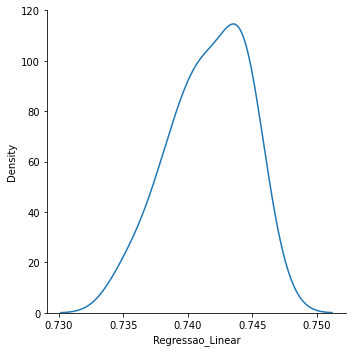

In [68]:
sns.displot(x= resultados['Regressao_Linear'], kind='kde');

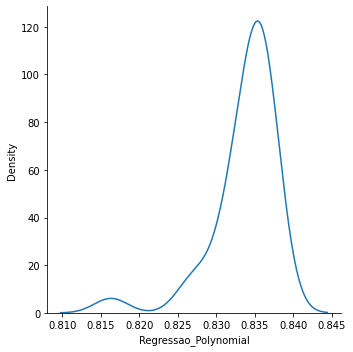

In [70]:
sns.displot(x= resultados['Regressao_Polynomial'], kind='kde');

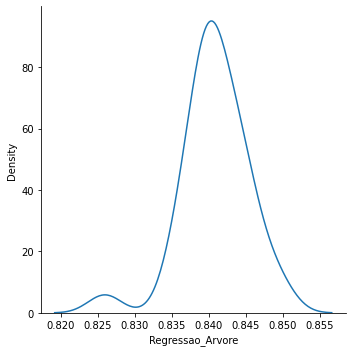

In [71]:
sns.displot(x= resultados['Regressao_Arvore'], kind='kde');

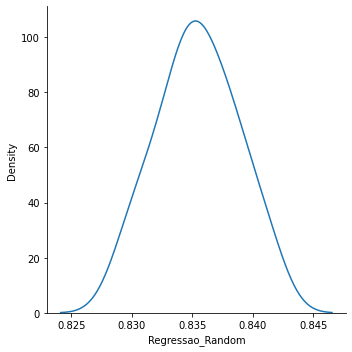

In [72]:
sns.displot(x= resultados['Regressao_Random'], kind='kde');

## Teste de hipótese Anova
objetico: saber se há diferença estatística ou não

In [78]:
from scipy.stats import f_oneway

In [84]:
_, p = f_oneway(resultados_arvore,resultados_linear,resultados_poly,resultados_random) # pegar so o p-values
p

1.2389484513588099e-120

In [86]:
if p >= alpha:
  print('hipótese alternativa descartada. não há diferença estatística')
elif p < alpha:
  print('hipótese nula descartada. há diferença estatística')

hipótese nula descartada. há diferença estatística


## Turke
objetivo: saber qual é o melhor algoritmo , já que teve diferença estatística 

In [90]:
# Passando todos os resultados de cada algoritmo para fazer um dataframe com seus respectivos resultados testados
resultados_algoritmos = {'accuracy':np.concatenate([resultados_linear,resultados_poly,resultados_arvore,resultados_random]),
                         'algoritmos':['Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear','Regressao_Linear',
                                       'Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly','Regressao_Poly',
                                       'Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore','Regressao_Arvore',
                                       'Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random','Regressao_Random']}

resultados_algoritmos = pd.DataFrame(resultados_algoritmos)
resultados_algoritmos

,accuracy,algoritmos
0,0.741524,Regressao_Linear
1,0.744483,Regressao_Linear
2,0.734720,Regressao_Linear
3,0.743844,Regressao_Linear
4,0.740252,Regressao_Linear
...,...,...
115,0.833830,Regressao_Random
116,0.840974,Regressao_Random
117,0.834361,Regressao_Random
118,0.838310,Regressao_Random


In [91]:
from statsmodels.stats.multicomp import MultiComparison

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [94]:
compara_algoritmo = MultiComparison(resultados_algoritmos['accuracy'],resultados_algoritmos['algoritmos'])

In [95]:
teste_algoritmo = compara_algoritmo.tukeyhsd()
print(teste_algoritmo)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
Regressao_Arvore Regressao_Linear  -0.0992  0.001 -0.1018 -0.0966   True
Regressao_Arvore   Regressao_Poly  -0.0072  0.001 -0.0097 -0.0046   True
Regressao_Arvore Regressao_Random  -0.0054  0.001  -0.008 -0.0028   True
Regressao_Linear   Regressao_Poly    0.092  0.001  0.0895  0.0946   True
Regressao_Linear Regressao_Random   0.0938  0.001  0.0912  0.0964   True
  Regressao_Poly Regressao_Random   0.0018 0.2821 -0.0008  0.0043  False
------------------------------------------------------------------------


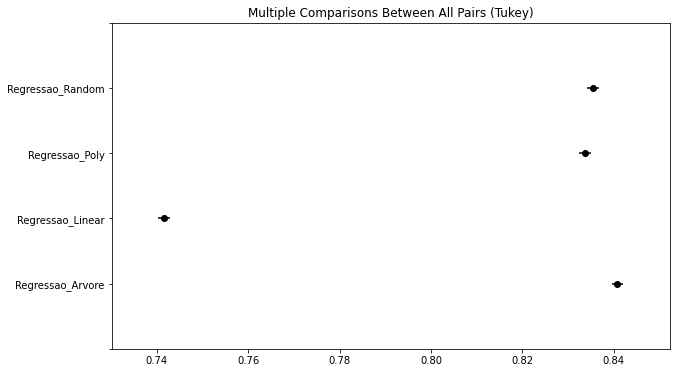

In [99]:
teste_algoritmo.plot_simultaneous();

## Pegando os três melhores algoritmos

In [101]:
classificador_arvore = DecisionTreeRegressor(criterion='mae',min_samples_leaf=5,min_samples_split=2)
classificador_arvore.fit(x_train_scaled,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [103]:
classificador_random = RandomForestRegressor()
classificador_random.fit(x_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [104]:
classificador_poly = LinearRegression()
classificador_poly.fit(x_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Salvando para produção 

In [107]:
import pickle
pickle.dump(classificador_arvore,open('classificador_arvore_finalizado.sav','wb'))
pickle.dump(classificador_random,open('classificador_random_finalizado.sav','wb'))
pickle.dump(classificador_poly,open('classificador_poly_finalizado.sav','wb'))